# Otimização Não-Linear (2022)
## Trabalho final (Código)

### Grupo
Andre Guarnier De Mitri - 11395579 \
Caio Assumpção Rezzadori - 11810481 \

In [1]:
#Bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Bibliotecas auxliares/complementares
import seaborn as sns
import matplotlib as  mpl
from matplotlib import axes
from sklearn.model_selection import train_test_split

mpl.rcParams.update(mpl.rcParamsDefault)
!pip install latex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for latex: filename=latex-0.7.0-py3-none-any.whl size=7606 sha256=07c6c0c6e441bef8eddd5ae01158bc5e038e94491bfc594de5665207cfb2ffb6
  Stored in directory: /root/.cache/pip/wheels/16/c1/33/30e79ef1232ec43bb51b17ad60c5bfa6849fa0c9bc939ca089
  Created wheel for data: filename=data-0.4-py3-none-any.whl size=7246 sha256=d2441e3d33e7c59c828013c4cd521850d1eea44722944e739f2efaa85eb555f0
  Stored in directory: /root/.cache/pip/wheels/5c/78/30/ac68ac8de8481b3b4334617a48ef1758323f30709b2f923362
  Created wheel for shutilwhich: filename=shutilwhich-1.1.0-py3-none-any.whl size=2782 sha256=10d79291516344f7b87f4123cddd7cbd7706e3435fbad43d7244c270b184f064
  Stored in directory: /root/.cache/pip/wheels/27/f1/8b/8e9215b5809387fcf93d0eb9c1a95a7cb30b369b3c1d986f1c
  Created wheel for tempdir: filename=tempdir-0.7.1-py3-none-any.whl size=2213 sha256=21310bf473a2a8a76683fb25d2b73912ac0c2e4d6f3ce

## Carregando os dados

In [3]:
url = 'https://drive.google.com/file/d/1_yVDFkwl0KxTl9zTHMw70IEfl2cqoIAb/view?usp=share_link'
url ='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


## Tratamento inicial dos dados

### Filtrando os dados de interesse para o problema

In [4]:
df = df.loc[:, ['diagnosis', 'radius_mean']]

### Coluna Categórica
Adicionando coluna "isMaligno" para representar se o tumor do paciente é maligno (Diagnostico "M") com o número 1, e benigno (Diagnostico "B") com o número 0.

In [5]:
# Trasnformando a string do diagnostico em uma variavel Binaria
df["isMaligno"] = df["diagnosis"].isin(["M"]).astype(int)
df

,diagnosis,radius_mean,isMaligno
0,M,17.99,1
1,M,20.57,1
2,M,19.69,1
3,M,11.42,1
4,M,20.29,1
...,...,...,...
564,M,21.56,1
565,M,20.13,1
566,M,16.60,1
567,M,20.60,1


## Variáveis de predição e resposta

In [6]:
#Selecionando variavel preditora
Xd = df[['radius_mean']]

#Inserindo coluna para o parametro  que independe de x (theta_0)
Xd.insert(0, 'X0', 1)
Xd.head()

#Transformando os dados de valores para matriz
X = Xd.values
y = df.isMaligno.values

m = len(X)
print(f"Tamanho da amostra: {m}")

n = 2
print(f"Numero de covariaveis: {n}")

Tamanho da amostra: 569
Numero de covariaveis: 2


## Implementação das funções principais do problema

In [7]:
# Funcao logistica
def f_theta(theta, X = X):
  return 1/(1 + np.exp(-X@theta))

#Funcao de custo (deseja-se minimizar)
def J(theta, X=X, y=y, m=m):
    J = -y.T@np.log(f_theta(theta, X)) - (1-y).T@np.log(1-f_theta(theta, X))
    J = (1/m)*J
    return J

#Gradiente da funcao de custo
def J_grad(theta, X=X, y=y, m=m):
    dev = X.T@(f_theta(theta, X) - y)
    dev = (1/m)*dev
    return dev

## Método do Gradiente Descendente

#### Método convergindo

In [8]:
# Tamanho do passo(alpha)
a = 0.01*2*m/np.linalg.norm(X)

# Chute inicial
theta_k = np.zeros(n)

# Lista das iteracoes
J_list = []
theta_list = []

for i in range(2*10**5):
    J_val = J(theta_k) # Custo do theta da iteracao atual
    J_list.append(J_val) # Guardando custo da iteracao

    theta_k = theta_k - a*J_grad(theta_k) # Atualizando os parametros
    theta_list.append(list(theta_k)) # Guardando parametro da iteracao

    if(abs(J_grad(theta_k)[0]) <= 1e-15 and abs(J_grad(theta_k)[1]) <= 1e-15):
        # Condicao de parada de primeira ordem
        print(f"Parou na iteracao {i+1}")
        break

In [9]:
# Exibindo os resultados
print('Iterações: ', i + 1, "\nParâmetros estimados: ", theta_k, '\nValor da função de custo: ', J_val, '\nGradiente da função de custo: ', J_grad(theta_k))

Iterações:  200000 
Parâmetros estimados:  [-15.23815069   1.03304919] 
Valor da função de custo:  0.28999198415257965 
Gradiente da função de custo:  [ 7.69858228e-06 -5.38123831e-07]


In [10]:
tabela = pd.DataFrame({'Iterações':[i + 1], 'theta_0': [theta_k[0]], 'theta_1': [theta_k[1]], 'J(theta)': [J_val], 'nablaJ(theta)': [J_grad(theta_k)]}).style.hide_index()
tabela

Iterações,theta_0,theta_1,J(theta),nablaJ(theta)
200000,-15.238151,1.033049,0.289992,[ 7.69858228e-06 -5.38123831e-07]


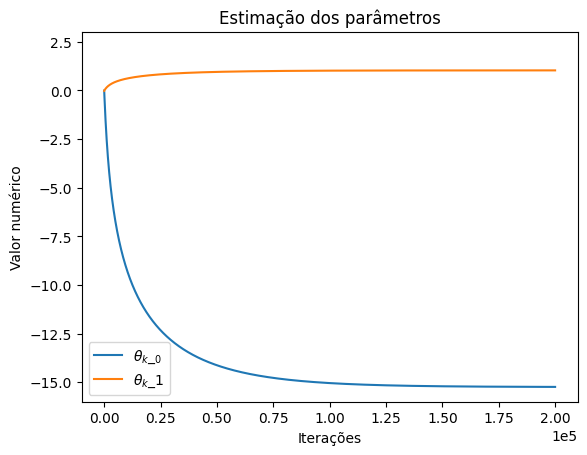

In [11]:
# Plotando as estimacoes dos parametros em funcao das iteracoes
fig, ax = plt.subplots()

ax.plot(theta_list)
ax.legend([r'$\theta_k\_ _0$', r'$\theta_k\_ 1$'])
ax.set_xlabel('Iterações')
ax.set_ylabel('Valor numérico')
ax.set_ylim([-16, 3])
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.set_title('Estimação dos parâmetros')
plt.show()

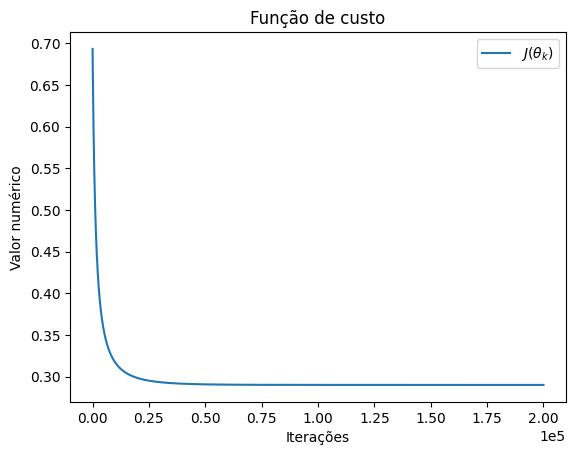

In [12]:
# Plotando o comportamento da funcao de custo
fig, ax = plt.subplots()

ax.plot(J_list)
ax.legend([r'$J({\theta}_k)$'])
ax.set_xlabel('Iterações')
ax.set_ylabel('Valor numérico')
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.set_title('Função de custo')
plt.show()

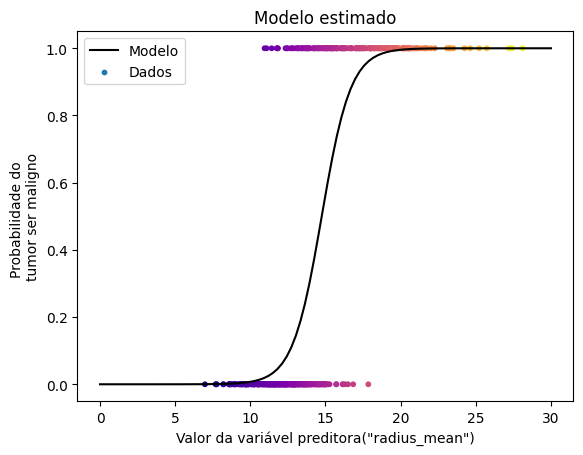

In [13]:
# Plotando o modelo estimado com os dados reais

X_plot = np.linspace(-0, 30, 100)
Y_plot = 1/(1 + np.exp(-theta_list[-1][0] - theta_list[-1][1]*X_plot))

fig, ax = plt.subplots()
ax.plot(X_plot, Y_plot, color = 'black')

t = range(1, 101)
ax.scatter(df.iloc[:, 1], df.loc[:, ['isMaligno']], s = 10, c = df.iloc[:, 1], cmap = 'plasma')

ax.set_title('Modelo estimado')
ax.set_xlabel('Valor da variável preditora(\"radius_mean\")')
ax.set_ylabel('Probabilidade do \ntumor ser maligno')
ax.legend(['Modelo', 'Dados'])

plt.show()

In [14]:
#Adicionando coluna das probabilidades calculadas
X_aux = df["radius_mean"]
Y_aux = 1/(1 + np.exp(-theta_list[-1][0] - theta_list[-1][1]*X_aux))
df["Probabilidade"] = Y_aux

#Coluna de classificação
#Probabilidades inferiores a 50% foram classificadas como tumores benignos 
df["Predito"] = 'M'
df.loc[df["Probabilidade"] < 0.5, "Predito"] = "B"
df

,diagnosis,radius_mean,isMaligno,Probabilidade,Predito
0,M,17.99,1,0.965987,M
1,M,20.57,1,0.997556,M
2,M,19.69,1,0.993956,M
3,M,11.42,1,0.031047,B
4,M,20.29,1,0.996739,M
...,...,...,...,...,...
564,M,21.56,1,0.999120,M
565,M,20.13,1,0.996155,M
566,M,16.60,1,0.871071,M
567,M,20.60,1,0.997630,M


In [15]:
#Calculando precisão do modelo
casos_corretos = df.loc[df["diagnosis"] == df["Predito"]]
casos_corretos.shape[0]/df.shape[0]

0.8787346221441125

### Método divergindo

In [16]:
# Tamanho do passo(alpha)
a = 2*m/np.linalg.norm(X)

# Chute inicial
theta_k = np.zeros(n)

# Lista das iteracoes
J_list = []
theta_list = []

for i in range(2*10**5):
    J_val = J(theta_k) # Custo do theta da iteracao atual
    J_list.append(J_val) # Guardando custo da iteracao

    theta_k = theta_k - a*J_grad(theta_k) # Atualizando os parametros
    theta_list.append(list(theta_k)) # Guardando parametro da iteracao

    if(abs(J_grad(theta_k)[0]) <= 1e-15 and abs(J_grad(theta_k)[1]) <= 1e-15):
        # Condicao de parada de primeira ordem
        print(f"Parou na iteracao {i+1}")
        break

<ipython-input-7-acfb9e96a745>:7: RuntimeWarning: divide by zero encountered in log
  J = -y.T@np.log(f_theta(theta, X)) - (1-y).T@np.log(1-f_theta(theta, X))
<ipython-input-7-acfb9e96a745>:7: RuntimeWarning: invalid value encountered in matmul
  J = -y.T@np.log(f_theta(theta, X)) - (1-y).T@np.log(1-f_theta(theta, X))


In [17]:
# Exibindo os resultados
print('Iterações: ', i + 1, "\nParâmetros estimados: ", theta_k, '\nValor da função de custo: ', J_val, '\nGradiente da função de custo: ', J_grad(theta_k))

Iterações:  200000 
Parâmetros estimados:  [-461.74598359   35.23790969] 
Valor da função de custo:  nan 
Gradiente da função de custo:  [0.16017806 2.3230175 ]


In [18]:
tabela = pd.DataFrame({'Iterações':[i + 1], 'theta_0': [theta_k[0]], 'theta_1': [theta_k[1]], 'J(theta)': [J_val], 'nablaJ(theta)': [J_grad(theta_k)]}).style.hide_index()
tabela

Iterações,theta_0,theta_1,J(theta),nablaJ(theta)
200000,-461.745984,35.237910,nan,[0.16017806 2.3230175 ]


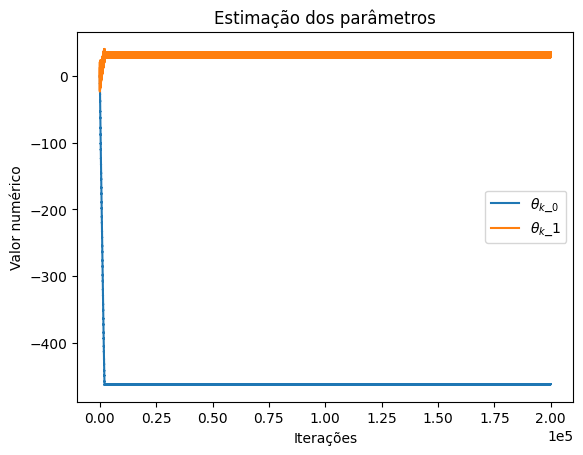

In [19]:
# Plotando as estimacoes dos parametros em funcao das iteracoes
fig, ax = plt.subplots()

ax.plot(theta_list)
ax.legend([r'$\theta_k\_ _0$', r'$\theta_k\_ 1$'])
ax.set_xlabel('Iterações')
ax.set_ylabel('Valor numérico')
#ax.set_ylim([-15, 3])
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.set_title('Estimação dos parâmetros')
plt.show()

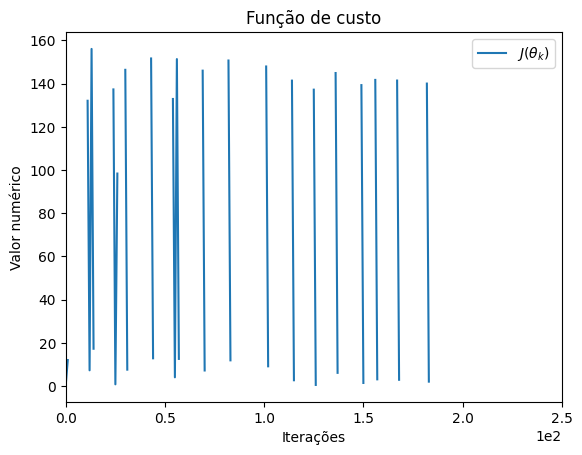

In [20]:
# Plotando o comportamento da funcao de custo
fig, ax = plt.subplots()

ax.plot(J_list)
ax.legend([r'$J({\theta}_k)$'])
ax.set_xlabel('Iterações')
ax.set_ylabel('Valor numérico')
ax.set_xlim([0, 0.25*10**3])
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.set_title('Função de custo')
plt.show()

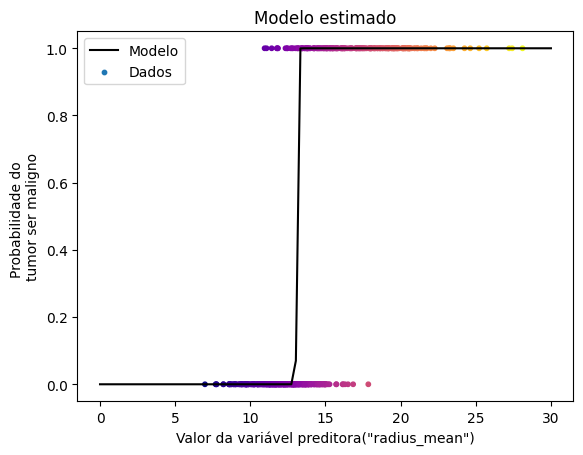

In [21]:
# Plotando o modelo estimado com os dados reais

X_plot = np.linspace(-0, 30, 100)
Y_plot = 1/(1 + np.exp(-theta_list[-1][0] - theta_list[-1][1]*X_plot))

fig, ax = plt.subplots()
ax.plot(X_plot, Y_plot, color = 'black')

t = range(1, 101)
ax.scatter(df.iloc[:, 1], df.loc[:, ['isMaligno']], s = 10, c = df.iloc[:, 1], cmap = 'plasma')

ax.set_title('Modelo estimado')
ax.set_xlabel('Valor da variável preditora(\"radius_mean\")')
ax.set_ylabel('Probabilidade do \ntumor ser maligno')
ax.legend(['Modelo', 'Dados'])

plt.show()

In [22]:
#Adicionando coluna das probabilidades calculadas
X_aux = df["radius_mean"]
Y_aux = 1/(1 + np.exp(-theta_list[-1][0] - theta_list[-1][1]*X_aux))
df["Probabilidade"] = Y_aux

#Coluna de classificação
#Probabilidades inferiores a 50% foram classificadas como tumores benignos 
df["Predito"] = 'M'
df.loc[df["Probabilidade"] < 0.5, "Predito"] = "B"
df

,diagnosis,radius_mean,isMaligno,Probabilidade,Predito
0,M,17.99,1,1.000000e+00,M
1,M,20.57,1,1.000000e+00,M
2,M,19.69,1,1.000000e+00,M
3,M,11.42,1,1.712848e-26,B
4,M,20.29,1,1.000000e+00,M
...,...,...,...,...,...
564,M,21.56,1,1.000000e+00,M
565,M,20.13,1,1.000000e+00,M
566,M,16.60,1,1.000000e+00,M
567,M,20.60,1,1.000000e+00,M


In [23]:
#Calculando precisão do modelo
casos_corretos = df.loc[df["diagnosis"] == df["Predito"]]
casos_corretos.shape[0]/df.shape[0]

0.7926186291739895

## Método de Newton

In [24]:
# Hessiana da funcao de custo
def J_hessian(theta, X=X, y=y, m=m):
    hess = (1/m)*X.T @ np.diag(f_theta(theta) * (1-f_theta(theta))) @ X 
    return hess

# Diracao do passo
def pk(theta, X=X, y=y, m=m):
    hessiana = J_hessian(theta)
    mult = np.linalg.solve(hessiana, -J_grad(theta))
    return mult

In [25]:
# Tamanho do passo(alpha)
a = 1

# Chute inicial
theta_k = np.zeros(n)

# Lista das iteracoes
J_list = []
theta_list = []

for i in range(100):
    J_val = J(theta_k) # Custo do theta da iteracao atual
    J_list.append(J_val) # Guardando custo da iteracao
    
    theta_k = theta_k + a*pk(theta_k) # Atualizando os parametros
    theta_list.append(list(theta_k)) # Guardando parametro da iteracao
    
    if(abs(J_grad(theta_k)[0]) <= 1e-15 and abs(J_grad(theta_k)[1]) <= 1e-15):
        # Condicao de parada de primeira ordem
        print(f"Parou na iteracao {i+1}")
        break

Parou na iteracao 8


In [26]:
# Exibindo os resultados
print('Iterações: ', i + 1, "\nParâmetros estimados: ", theta_k, '\nValor da função de custo: ', J_val, '\nGradiente da função de custo: ', J_grad(theta_k))

Iterações:  8 
Parâmetros estimados:  [-15.24587078   1.03358882] 
Valor da função de custo:  0.28999195429487246 
Gradiente da função de custo:  [-6.17006309e-17 -8.43371335e-16]


In [27]:
tabela = pd.DataFrame({'Iterações':[i + 1], 'theta_0': [theta_k[0]], 'theta_1': [theta_k[1]], 'J(theta)': [J_val], 'nablaJ(theta)': [J_grad(theta_k)]}).style.hide_index()
tabela

Iterações,theta_0,theta_1,J(theta),nablaJ(theta)
8,-15.245871,1.033589,0.289992,[-6.17006309e-17 -8.43371335e-16]


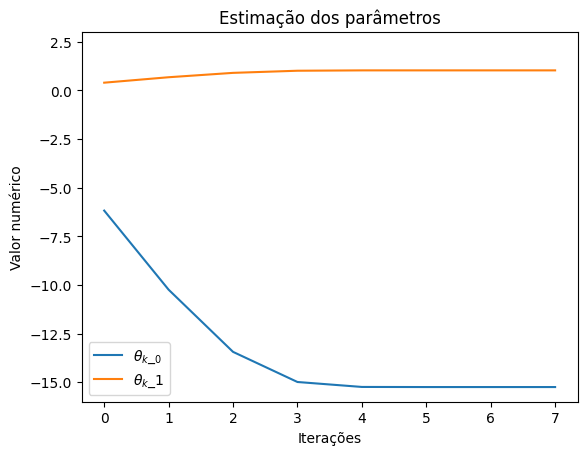

In [28]:
# Plotando as estimacoes dos parametros em funcao das iteracoes
fig, ax = plt.subplots()

ax.plot(theta_list)
ax.legend([r'$\theta_k\_ _0$', r'$\theta_k\_ 1$'])
ax.set_xlabel('Iterações')
ax.set_ylabel('Valor numérico')
ax.set_ylim([-16, 3])
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.set_title('Estimação dos parâmetros')
plt.show()

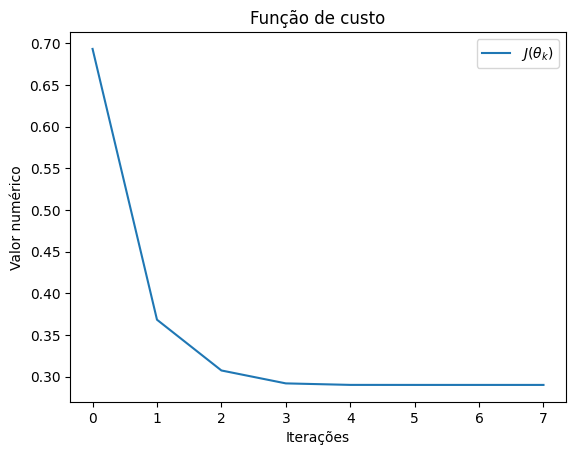

In [29]:
# Plotando o comportamento da funcao de custo
fig, ax = plt.subplots()

ax.plot(J_list)
ax.legend([r'$J({\theta}_k)$'])
ax.set_xlabel('Iterações')
ax.set_ylabel('Valor numérico')
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.set_title('Função de custo')
plt.show()

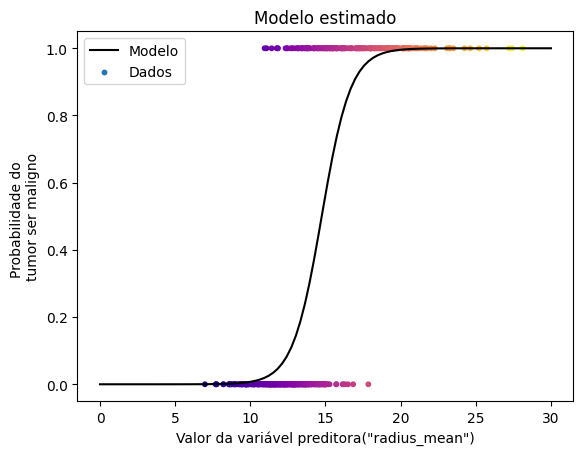

In [30]:
# Plotando o modelo estimado com os dados reais

X_plot = np.linspace(-0, 30, 100)
Y_plot = 1/(1 + np.exp(-theta_list[-1][0] - theta_list[-1][1]*X_plot))

fig, ax = plt.subplots()
ax.plot(X_plot, Y_plot, color = 'black')

t = range(1, 101)
ax.scatter(df.iloc[:, 1], df.loc[:, ['isMaligno']], s = 10, c = df.iloc[:, 1], cmap = 'plasma')

ax.set_title('Modelo estimado')
ax.set_xlabel('Valor da variável preditora(\"radius_mean\")')
ax.set_ylabel('Probabilidade do \ntumor ser maligno')
ax.legend(['Modelo', 'Dados'])

plt.show()

In [31]:
#Adicionando coluna das probabilidades calculadas
X_aux = df["radius_mean"]
Y_aux = 1/(1 + np.exp(-theta_list[-1][0] - theta_list[-1][1]*X_aux))
df["Probabilidade"] = Y_aux

#Coluna de classificação
#Probabilidades inferiores a 50% foram classificadas como tumores benignos 
df["Predito"] = 'M'
df.loc[df["Probabilidade"] < 0.5, "Predito"] = "B"
df

,diagnosis,radius_mean,isMaligno,Probabilidade,Predito
0,M,17.99,1,0.966052,M
1,M,20.57,1,0.997564,M
2,M,19.69,1,0.993973,M
3,M,11.42,1,0.031000,B
4,M,20.29,1,0.996749,M
...,...,...,...,...,...
564,M,21.56,1,0.999123,M
565,M,20.13,1,0.996167,M
566,M,16.60,1,0.871210,M
567,M,20.60,1,0.997638,M


In [32]:
#Calculando precisão do modelo
casos_corretos = df.loc[df["diagnosis"] == df["Predito"]]
casos_corretos.shape[0]/df.shape[0]

0.8787346221441125